# Example 

> Jupyter Notebook에서 Streamlit을 사용하는 예시입니다.

[![Streamlit App](https://static.streamlit.io/badges/streamlit_badge_black_white.svg)](https://ddobrinskiy-jupyter.streamlit.app/)

이 예시에서는 [nbdev](https://nbdev.fast.ai/)를 사용한 셀만을 `.py` 파일로 내보냅니다.
즉, Jupyter Notebook에서 작성한 코드 중에서 필요한 부분만을 추출하여 `.py` 파일로 내보낼 수 있습니다.

내보내고자 하는 셀을 `#|export` 또는 `#|exporti` 지시문과 함께 시작하세요.

모든 작업을 마쳤다면 마지막에 `.ipynb` 파일을 `.py` 파일로 변환하기 위해 `nb_export`를 실행하세요.

```python
from nbdev.export import nb_export
nb_export('ipynb 파일명.ipynb', lib_path='.', name='.py로 생성되는 파일명')
```

bash에서 기본 제공되는 `nbconvert`를 사용할 수도 있지만, `nbdev` 보다는 제한적입니다.

In [2]:
%load_ext autoreload

%autoreload 2

In [3]:
# |exporti

from datetime import datetime

import streamlit as st

from streamlit_jupyter import StreamlitPatcher, tqdm

In [4]:
sp = StreamlitPatcher()
sp.jupyter()  # register patcher with streamlit

In [5]:
# |exporti

st.title("Example")8451

# Example

In [6]:
# |exporti

st.markdown(
    """

streamlit_jupyter의 사용 예를 보여주는 테스트 페이지입니다.

Jupyter에서 해당 메시지를 보신다면, 잘 작동하고 있습니다!

"""
)



streamlit_jupyter의 사용 예를 보여주는 테스트 페이지입니다.

Jupyter에서 해당 메시지를 보신다면, 잘 작동하고 있습니다!



In [7]:
sp.registered_methods

{'cache',
 'cache_data',
 'cache_resource',
 'caption',
 'checkbox',
 'code',
 'dataframe',
 'date_input',
 'expander',
 'experimental_data_editor',
 'header',
 'json',
 'latex',
 'markdown',
 'metric',
 'multiselect',
 'radio',
 'selectbox',
 'subheader',
 'text',
 'text_area',
 'text_input',
 'title',
 'write'}

In [90]:
# |exporti

name = st.text_input("이름을 입력하세요", "라이캣")

Textarea(value='라이캣', description='이름을 입력하세요', placeholder='Type something')

In [64]:
# |exporti

date = st.date_input("날짜를 선택하세요.", datetime.now().date())

DatePicker(value=Timestamp('2023-06-18 00:00:00'), description='날짜를 선택하세요.')

In [65]:
# |exporti

st.markdown(f"## Hello {name}!\n## 오늘 날짜는 {date.strftime('%Y-%m-%d')}")

## Hello 라이캣!
## 오늘 날짜는 2023-06-18

In [66]:
# |exporti

import time

import pandas as pd

st.subheader("Cached 데이터프레임")

@st.cache_data()
def get_data(date):
    for i in tqdm(range(10)):
        time.sleep(0.1)
    return pd.DataFrame(
        {"date": pd.date_range(date, periods=3), "c": [7, 8, 5], "d": [10, 11, 7]}
    ).set_index("date")


df_date = get_data(date)
st.write(df_date)

### Cached 데이터프레임

  0%|          | 0/10 [00:00<?, ?it/s]

,c,d
date,,
2023-06-18,7,10
2023-06-19,8,11
2023-06-20,5,7


In [67]:
# |exporti

st.subheader("Data Editor")
df = pd.DataFrame(
    [
       {"command": "st.selectbox", "rating": 4, "is_widget": True, },
       {"command": "st.balloons", "rating": 5, "is_widget": False, },
       {"command": "st.time_input", "rating": 3, "is_widget": True,},
   ]
)
edited_df = st.experimental_data_editor(df)

### Data Editor

,command,rating,is_widget
0,st.selectbox,4,True
1,st.balloons,5,False
2,st.time_input,3,True


In [68]:
# |exporti


st.subheader("Cache 예시")
@st.cache_resource(ttl=3600)
def get_resource():
    st.write("Getting resource...")
    for i in tqdm(range(5)):
        time.sleep(0.1)
    return {
        "foo": "bar",
        "baz": [1, 2, 3],
        "qux": {"a": 1, "b": 2, "c": 3},
    }


records = get_resource()
st.json(records)

### Cache 예시

Getting resource...

  0%|          | 0/5 [00:00<?, ?it/s]

```json
{
  "foo": "bar",
  "baz": [
    1,
    2,
    3
  ],
  "qux": {
    "a": 1,
    "b": 2,
    "c": 3
  }
}
```

In [69]:
df_date.mean(axis = 1)

date
2023-06-18    8.5
2023-06-19    9.5
2023-06-20    6.0
dtype: float64

### Ploting

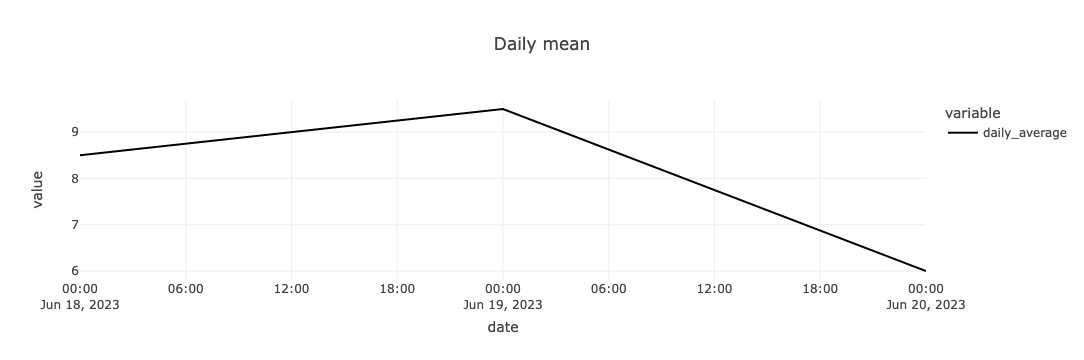

In [70]:
# |exporti

st.subheader("Ploting")

import plotly.express as px

df_daily = df_date.mean(axis=1).rename("daily_average")
fig = px.line(df_daily, title="Daily mean", width=600)
st.write(fig)

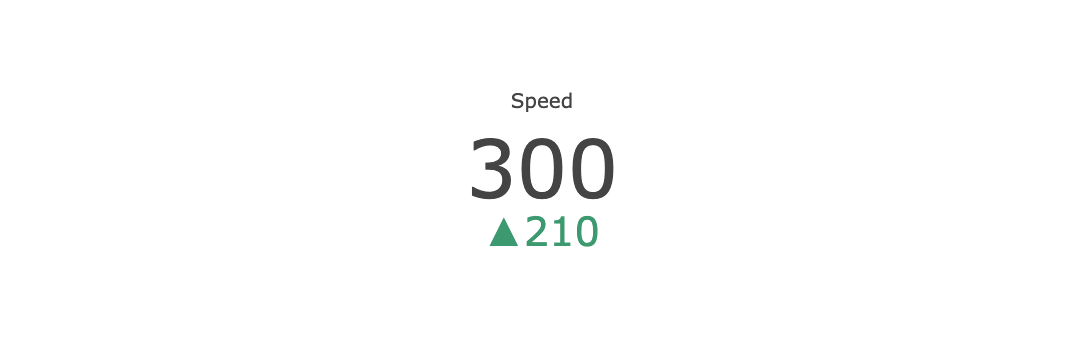

In [71]:
# | exporti

st.metric("Speed", 300, 210)

In [72]:
# |exporti

st.code("print(1+1)", language="python")

```python
print(1+1)
```

In [73]:
# |exporti

show_code = st.checkbox("Show code", value=True)

Checkbox(value=True, description='Show code', indent=False)

In [74]:
# |exporti

if show_code:
    st.code("[i**2 for i in range(100)]")

```python
[i**2 for i in range(100)]
```

In [75]:
# |exporti

option = st.radio("Choose one option", options=["foo", "bar"], index=1)

RadioButtons(description='Choose one option', index=1, options=('foo', 'bar'), value='bar')

In [76]:
# |exporti

option = st.selectbox("Selectbox: ", options=["LiCat", "Garry", "SoulGom"], index=0)

Dropdown(description='Selectbox: ', options=('LiCat', 'Garry', 'SoulGom'), value='LiCat')

In [77]:
# |exporti

options = st.multiselect("Multiselect: ", options=["Python", "Golang", "Julia", "Rust"])

SelectMultiple(description='Multiselect: ', options=('Python', 'Golang', 'Julia', 'Rust'), value=())

In [78]:
# |exporti

options = st.multiselect(
    "Multiselect with defaults: ",
    options=["nbdev", "streamlit", "jupyter", "fastcore"],
    default=["jupyter", "streamlit"],
)

SelectMultiple(description='Multiselect with defaults: ', index=(2, 1), options=('nbdev', 'streamlit', 'jupyte…

In [86]:
# | exporti
st.subheader("st.text:")
st.text("텍스트 문구입니다.")
st.text("이것은 \n 여러 줄의 텍스트입니다.")
st.code("이것은 여러 줄의 \n 코드입니다", language=None)

### st.text:

```None
텍스트 문구입니다.
```

```None
이것은 
 여러 줄의 텍스트입니다.
```

```None
이것은 여러 줄의 
 코드입니다
```

In [89]:
from nbdev.export import nb_export

nb_export("streamlit-jupyter_example.ipynb", lib_path="./", name="example")